<a href="https://colab.research.google.com/github/DevashishX/Deep-Learning-Models/blob/master/DLAZ_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks from Deep Learning A-Z on Udemy

# Fetch and unpack the data

In [0]:
!wget https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P16-Convolutional-Neural-Networks.zip
!unzip -q P16-Convolutional-Neural-Networks.zip 
!mv ./Convolutional_Neural_Networks/dataset .

--2020-05-05 10:47:10--  https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P16-Convolutional-Neural-Networks.zip
Resolving sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)... 52.219.80.176
Connecting to sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)|52.219.80.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 233354462 (223M) [application/zip]
Saving to: ‘P16-Convolutional-Neural-Networks.zip’

P16-Convolutional-N 100%[===================>] 222.54M  13.0MB/s    in 19s     

2020-05-05 10:47:29 (11.9 MB/s) - ‘P16-Convolutional-Neural-Networks.zip’ saved [233354462/233354462]



# Keras Libs

In [1]:
%tensorflow_version 2.x

import tensorflow
print(tensorflow.__version__)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Dropout

# from keras.models import Sequential
# from keras.layers import Conv2D
# from keras.layers import MaxPooling2D
# from keras.layers import Flatten
# from keras.layers import Dense

2.2.0-rc4


# Build Model

In [0]:

img_width, img_height = 150, 150 
# In[4]:
# Initialising the CNN
classifier = Sequential()
# Regulize
# classifier.add(Dropout(rate=0.2, input_shape = (128, 128, 3)))
# Step 1 - Adding a first convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (img_width, img_height, 3)))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a third convolutional layer
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a fourth convolutional layer
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dropout(rate=0.6))
classifier.add(Dense(units = 64, activation='relu'))
classifier.add(Dropout(rate=0.3))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# classifier = Sequential()

# classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
# classifier.add(MaxPooling2D(pool_size = (2, 2)))

# classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
# classifier.add(MaxPooling2D(pool_size = (2, 2)))

# classifier.add(Flatten())

# classifier.add(Dense(units = 128, activation = 'relu'))
# classifier.add(Dense(units = 1, activation = 'sigmoid'))

# classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

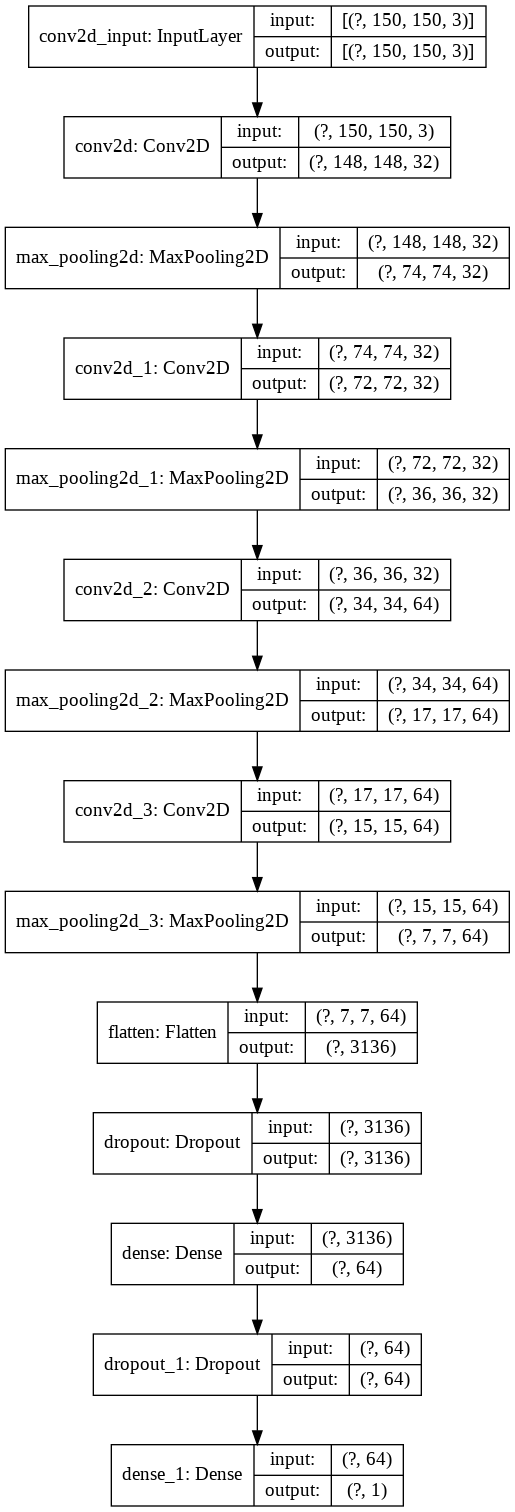

In [3]:
from tensorflow.keras.utils import plot_model
plot_model(classifier, show_shapes=True, show_layer_names=True)

# Read Dataset


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (img_width, img_height),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (img_width, img_height),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


# Train Convolutional Neural Network

In [0]:
device_name = tensorflow.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')
else:
    print("OK: ", device_name)

OK:  /device:GPU:0


In [0]:
%%time
# import tensorflow as tf
# with tf.device('/device:GPU:0'):
hist = classifier.fit_generator(training_set,
                        steps_per_epoch = 8000/100,
                        epochs = 100,
                        workers=24,
                        max_queue_size=20,
                        # use_multiprocessing = True,
                        validation_data = test_set,
                        validation_steps = 2000/100)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
80/80 [==============================] - 12s 149ms/step - loss: 0.6955 - accuracy: 0.4973 - val_loss: 0.6911 - val_accuracy: 0.5016
Epoch 2/100
80/80 [==============================] - 12s 156ms/step - loss: 0.6935 - accuracy: 0.5055 - val_loss: 0.6947 - val_accuracy: 0.4844
Epoch 3/100
80/80 [==============================] - 12s 155ms/step - loss: 0.6936 - accuracy: 0.5047 - val_loss: 0.6922 - val_accuracy: 0.5188
Epoch 4/100
80/80 [==============================] - 12s 154ms/step - loss: 0.6848 - accuracy: 0.5551 - val_loss: 0.6529 - val_accuracy: 0.6202
Epoch 5/100
80/80 [==============================] - 12s 155ms/step - loss: 0.6714 - accuracy: 0.5660 - val_loss: 0.6843 - val_accuracy: 0.6047
Epoch 6/100
80/80 [==============================] - 13s 158ms/step - loss: 0.6517 - accuracy: 0.5992 - val_loss: 0.6289 - val_accuracy: 0.6406
Epoch 7/100
80/80 [==============================] - 13s 158

In [0]:
!nvidia-smi

Tue May  5 12:17:05 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    31W / 250W |   2125MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
classifier.save("CNN_Cat_dog.h5")